### Import Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

### Import Datasets

In [3]:
hot100 = pd.read_csv("/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Data/hot100features.csv")
nothot = pd.read_csv("/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Data/nothotfeatures2.csv")
hot100['hot/not']="hot"
nothot['hot/not']="not"

In [4]:
display(hot100.head())
display(nothot.head())
print(hot100.shape)
print(nothot.shape)

,track,artist,album,id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hot/not
0,Heat Waves,Glass Animals,Dreamland,3USxtqRwSYz57Ewm6wWRMp,0.761,0.525,11,-6.900,1,0.0944,0.000007,0.0921,0.531,80.870,238805,4,hot
1,We Don't Talk About Bruno,Lin-Manuel Miranda,Encanto (Original Motion Picture Soundtrack),52xJxFP6TqMuO4Yt0eOkMz,0.577,0.450,0,-8.516,0,0.0834,0.000000,0.1110,0.830,205.863,216120,4,hot
2,Super Gremlin,Sniper Gang,Sniper Gang Presents Syko Bob & Snapkatt: Nigh...,4A8cWXxKfIL3lAyUDzXbCF,0.825,0.414,2,-6.634,1,0.1440,0.000000,0.3570,0.106,72.993,200548,4,hot
3,abcdefu,GAYLE,abcdefu,4fouWK6XVHhzl78KzQ1UjL,0.695,0.540,4,-5.692,1,0.0493,0.000000,0.3670,0.415,121.932,168602,4,hot
4,STAY (with Justin Bieber),The Kid LAROI,STAY (with Justin Bieber),5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.000000,0.1030,0.478,169.928,141806,4,hot


,track,artist,album,id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hot/not
0,Everybody (Backstreet's Back) - Radio Edit,Various Artists,This Is The End: Original Motion Picture Sound...,4rTeOSYqwXNz5qPR2DUTFZ,0.735,0.873,10,-3.493,0,0.0402,0.000003,0.2650,0.586,108.021,224960,4,not
1,U Can't Touch This,MC Hammer,Please Hammer Don't Hurt 'Em,1B75hgRqe7A4fwee3g3Wmu,0.867,0.517,11,-13.222,0,0.0875,0.000339,0.0864,0.866,133.148,257360,4,not
2,Black or White,Michael Jackson,Dangerous,7EsjkelQuoUlJXEw7SeVV4,0.518,0.901,9,-3.749,1,0.0930,0.031400,0.0712,0.873,115.026,254933,4,not
3,Gangsta's Paradise,Coolio,Gangsta's Paradise,1DIXPcTDzTj8ZMHt3PDt8p,0.647,0.514,8,-10.050,1,0.0593,0.000000,0.3980,0.386,79.975,240693,4,not
4,MMMBop,Hanson,Middle Of Nowhere,0lnxrQAd9ZxbhBBe7d8FO8,0.683,0.937,9,-6.335,1,0.0449,0.004600,0.0700,0.619,104.872,268653,4,not


(95, 17)
(3109, 17)


In [5]:
# Concat the data

allsongs = pd.concat([hot100, nothot],axis=0)
display(allsongs.head())
allsongs.shape
allsongs=allsongs.reset_index()

,track,artist,album,id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hot/not
0,Heat Waves,Glass Animals,Dreamland,3USxtqRwSYz57Ewm6wWRMp,0.761,0.525,11,-6.900,1,0.0944,0.000007,0.0921,0.531,80.870,238805,4,hot
1,We Don't Talk About Bruno,Lin-Manuel Miranda,Encanto (Original Motion Picture Soundtrack),52xJxFP6TqMuO4Yt0eOkMz,0.577,0.450,0,-8.516,0,0.0834,0.000000,0.1110,0.830,205.863,216120,4,hot
2,Super Gremlin,Sniper Gang,Sniper Gang Presents Syko Bob & Snapkatt: Nigh...,4A8cWXxKfIL3lAyUDzXbCF,0.825,0.414,2,-6.634,1,0.1440,0.000000,0.3570,0.106,72.993,200548,4,hot
3,abcdefu,GAYLE,abcdefu,4fouWK6XVHhzl78KzQ1UjL,0.695,0.540,4,-5.692,1,0.0493,0.000000,0.3670,0.415,121.932,168602,4,hot
4,STAY (with Justin Bieber),The Kid LAROI,STAY (with Justin Bieber),5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.000000,0.1030,0.478,169.928,141806,4,hot


In [6]:
features = allsongs[['danceability','energy','speechiness','valence','tempo']]
print(features.shape)
features

(3204, 5)


,danceability,energy,speechiness,valence,tempo
0,0.761,0.5250,0.0944,0.5310,80.870
1,0.577,0.4500,0.0834,0.8300,205.863
2,0.825,0.4140,0.1440,0.1060,72.993
3,0.695,0.5400,0.0493,0.4150,121.932
4,0.591,0.7640,0.0483,0.4780,169.928
...,...,...,...,...,...
3199,0.343,0.0342,0.0406,0.0378,60.228
3200,0.382,0.0499,0.0548,0.0779,125.903
3201,0.151,0.0639,0.0439,0.0797,61.577
3202,0.226,0.0938,0.1000,0.1160,61.191


In [7]:
features.describe()

,danceability,energy,speechiness,valence,tempo
count,3204.000000,3204.000000,3204.00000,3204.000000,3204.000000
mean,0.634572,0.687873,0.16852,0.528539,118.118807
std,0.164440,0.180806,0.14557,0.229350,30.317738
min,0.068500,0.005010,0.02310,0.006170,47.362000
25%,0.532000,0.578000,0.04370,0.355000,92.394750
50%,0.652000,0.708000,0.10600,0.537000,115.415500
75%,0.757000,0.823000,0.28700,0.708000,138.550750
max,0.979000,0.999000,0.90100,0.989000,212.008000


In [8]:
scaler = StandardScaler()
scaler.fit(features) 
features_scaled = scaler.transform(features)
filename = "/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Classification/pickle5/scaler.pickle"
with open(filename, "wb") as f:
    pickle.dump(scaler,f)
features_scaled_df = pd.DataFrame(features_scaled, columns = features.columns)
display(features.head())
display(features_scaled_df.head())

,danceability,energy,speechiness,valence,tempo
0,0.761,0.525,0.0944,0.531,80.870
1,0.577,0.450,0.0834,0.830,205.863
2,0.825,0.414,0.1440,0.106,72.993
3,0.695,0.540,0.0493,0.415,121.932
4,0.591,0.764,0.0483,0.478,169.928


,danceability,energy,speechiness,valence,tempo
0,0.768963,-0.900955,-0.509249,0.010732,-1.228806
1,-0.350161,-1.315829,-0.584826,1.314621,2.894605
2,1.158223,-1.514969,-0.168467,-1.842622,-1.488662
3,0.367538,-0.817980,-0.819114,-0.495124,0.125794
4,-0.265011,0.421110,-0.825985,-0.220392,1.709141


In [9]:
features_scaled_df.describe()

,danceability,energy,speechiness,valence,tempo
count,3.204000e+03,3.204000e+03,3.204000e+03,3.204000e+03,3.204000e+03
mean,-2.777637e-16,-3.696585e-16,-4.171653e-16,-5.752092e-18,3.399278e-16
std,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00
min,-3.442957e+00,-3.777359e+00,-9.991247e-01,-2.277963e+00,-2.334206e+00
25%,-6.238601e-01,-6.077775e-01,-8.575899e-01,-7.567743e-01,-8.486145e-01
50%,1.060033e-01,1.113374e-01,-4.295502e-01,3.689712e-02,-8.917979e-02
75%,7.446338e-01,7.474775e-01,8.140322e-01,7.825994e-01,6.740322e-01
max,2.094881e+00,1.721048e+00,5.032594e+00,2.007993e+00,3.097324e+00


Training a K-Means model with 2 neighbours! 

Training a K-Means model with 3 neighbours! 

Training a K-Means model with 4 neighbours! 

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

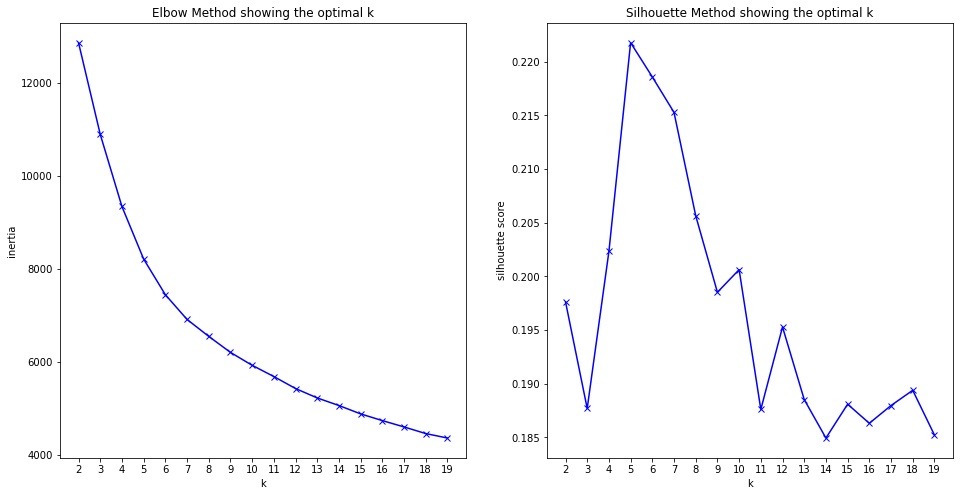

In [10]:
K = range(2, 20)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(features_scaled_df)
    filename = "/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Classification/pickle5/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(features_scaled_df, kmeans.predict(features_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

### Load Scaler and best model

In [11]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!")

In [12]:
scaler2 = load("/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Classification/pickle5/scaler.pickle")
scaler2

StandardScaler()

In [13]:
best_model = load("/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Classification/pickle5/kmeans_5.pickle")

In [14]:
clusters = best_model.predict(features_scaled_df)
pd.Series(clusters).value_counts().sort_index()
allsongs_final=allsongs.copy()
allsongs_final["cluster"] = clusters

In [15]:
allsongs_final

,index,track,artist,album,id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hot/not,cluster
0,0,Heat Waves,Glass Animals,Dreamland,3USxtqRwSYz57Ewm6wWRMp,0.761,0.5250,11,-6.900,1,0.0944,0.000007,0.0921,0.5310,80.870,238805,4,hot,1
1,1,We Don't Talk About Bruno,Lin-Manuel Miranda,Encanto (Original Motion Picture Soundtrack),52xJxFP6TqMuO4Yt0eOkMz,0.577,0.4500,0,-8.516,0,0.0834,0.000000,0.1110,0.8300,205.863,216120,4,hot,3
2,2,Super Gremlin,Sniper Gang,Sniper Gang Presents Syko Bob & Snapkatt: Nigh...,4A8cWXxKfIL3lAyUDzXbCF,0.825,0.4140,2,-6.634,1,0.1440,0.000000,0.3570,0.1060,72.993,200548,4,hot,1
3,3,abcdefu,GAYLE,abcdefu,4fouWK6XVHhzl78KzQ1UjL,0.695,0.5400,4,-5.692,1,0.0493,0.000000,0.3670,0.4150,121.932,168602,4,hot,1
4,4,STAY (with Justin Bieber),The Kid LAROI,STAY (with Justin Bieber),5HCyWlXZPP0y6Gqq8TgA20,0.591,0.7640,1,-5.484,1,0.0483,0.000000,0.1030,0.4780,169.928,141806,4,hot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,3104,"Liebestraume, S541/R211 : No. 3: Nocturne in A...",Franz Liszt,Liszt: Scherzo and March / 3 Liebestraume / Be...,6GzMz3s0K1YKwRVI36CgRx,0.343,0.0342,8,-25.591,1,0.0406,0.920000,0.1000,0.0378,60.228,270000,3,not,1
3200,3105,"Fantasia in D Minor, K. 397",Wolfgang Amadeus Mozart,"Mozart: Piano Sonatas K.310, K.311 & K.533/494",7IHEJdJhju1F2rhIiwgawx,0.382,0.0499,2,-25.262,1,0.0548,0.906000,0.1090,0.0779,125.903,316653,4,not,1
3201,3106,Scheherazade: The Tale of the Kalendar Prince,Nikolai Rimsky-Korsakov,Rimsky-Korsakov: Scheherezade,04eShjKTWijeJJqGnhxpYK,0.151,0.0639,11,-24.404,0,0.0439,0.603000,0.4660,0.0797,61.577,200360,3,not,1
3202,3107,Symphonie fantastique: V. Dream of a Witches' ...,Hector Berlioz,"Berlioz: Overture to Benvenuto Cellini, Sympho...",47edkNrKZ4Zyp5CeDeZc43,0.226,0.0938,0,-26.871,0,0.1000,0.705000,0.8900,0.1160,61.191,614907,4,not,1


In [16]:
allsongs_final['cluster'].value_counts()

4    890
2    747
0    566
1    534
3    467
Name: cluster, dtype: int64

In [17]:
allsongs_final.to_csv("/Users/robertkammerer/Ironhack/06_Week/Labs_Week_6/Spotify_Project/Data/clustered_songdatabase_5d_5.csv",index=False)